In [34]:
import os
os.chdir('F:/datasets')
import pandas as pd
import numpy as np

import scipy.stats as stats # used for the plotting of the qq plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [35]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()
#df.isnull().sum()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23132\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [37]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23132\1029530883.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


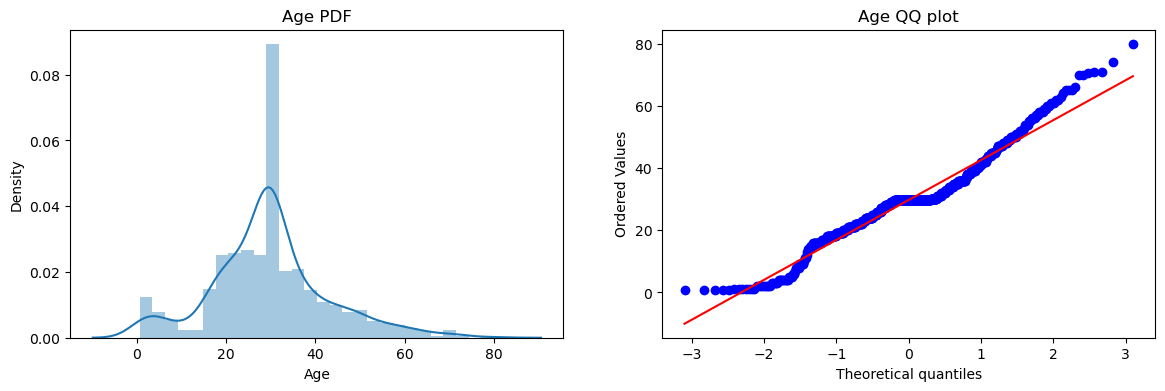

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ plot')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23132\1477523220.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


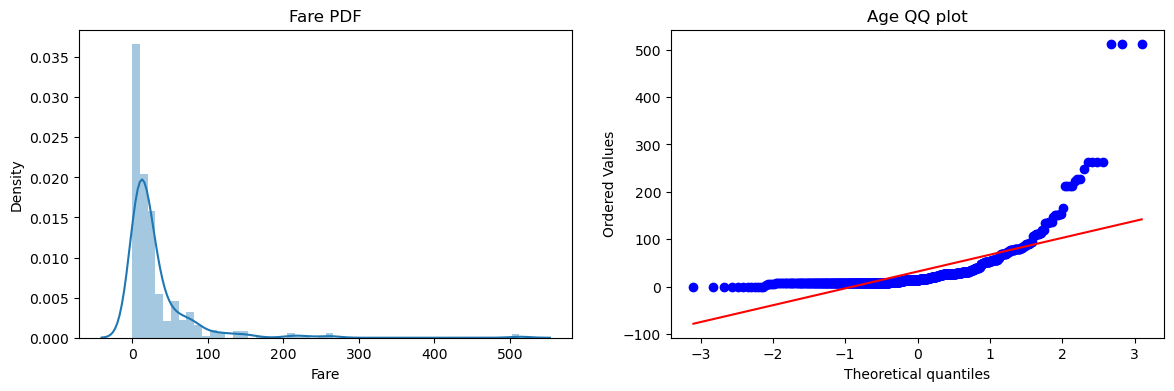

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ plot')
plt.show()


In [50]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [51]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)
print("Accuracy of LR", accuracy_score(y_pred,y_test))
print("Accuracy of DTC", accuracy_score(y_pred1,y_test))


Accuracy of LR 0.6983240223463687
Accuracy of DTC 0.664804469273743


In [52]:
trf=FunctionTransformer(func=np.log1p) ## log(x+1) adds 1 to the argument in case of zero occurs
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)


In [53]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)
print("Accuracy of LR", accuracy_score(y_pred,y_test))
print("Accuracy of DTC", accuracy_score(y_pred1,y_test))
#dt algorithm is one of those jinko data ke distribution se jyada kuch farak nahi padta

Accuracy of LR 0.7039106145251397
Accuracy of DTC 0.6759776536312849


In [67]:
# applied cross val score 
X_transformed=trf.fit_transform(X)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DTC",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DTC 0.6543695380774033


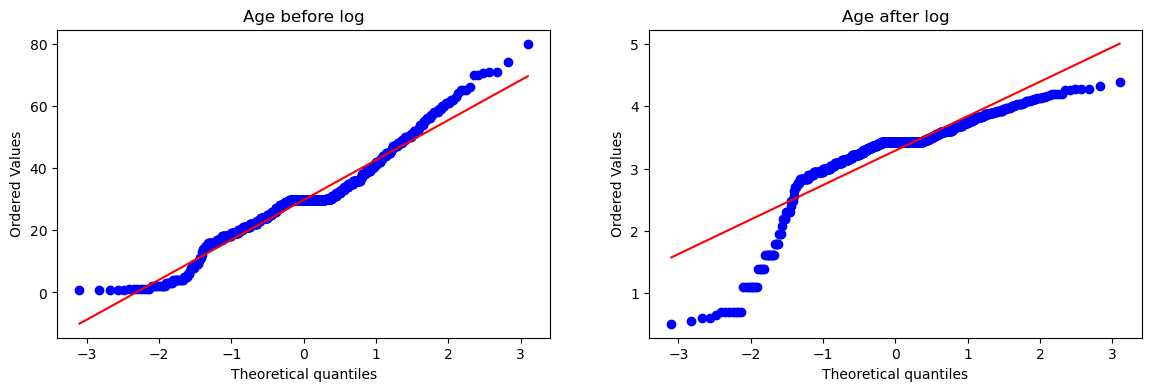

In [62]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age after log')
plt.show()
#the distribution of age was better earlier before applying log because the data as not right skewed and still we applid log transform

#### Applying log transform to fare column only

In [65]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [66]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
y_pred=clf.predict(X_test_transformed2)
y_pred1=clf2.predict(X_test_transformed2)
print("Accuracy of LR", accuracy_score(y_pred,y_test))
print("Accuracy of DTC", accuracy_score(y_pred1,y_test))

Accuracy of LR 0.6815642458100558
Accuracy of DTC 0.6703910614525139


In [68]:
# applied cross val score 
X_transformed2=trf.fit_transform(X)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DTC",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))



LR 0.678027465667915
DTC 0.6689388264669164


In [73]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans=trf.fit_transform(X)
    clf=LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare before log')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare after log')
    plt.show()

Accuracy 0.61729088639201


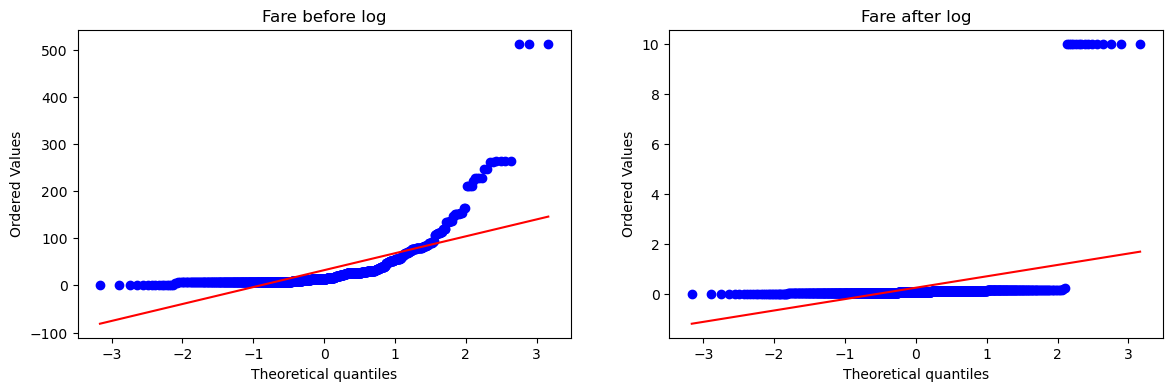

In [81]:
apply_transform(lambda x: 1/(x+0.1))